In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16, 5)

prices = pd.read_excel('data/prices/prices.xlsx', header=0, index_col=0)
prices = prices.drop([2018, 2019], axis=1)

prices_may = pd.read_excel('data/prices/prices_end_may.xlsx', header=0, index_col=0)
prices_may = prices_may.drop([2018, 2019], axis=1)

display(prices.head())

,Category,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Château Lafite Rothschild,Premier cru 1855,671.0,1133.0,284.0,2666.0,574.0,668.0,432.0,618.0,310.0,...,595,694,712,498,511.0,485.0,563.0,584.0,835.0,516.0
Château Latour,Premier cru 1855,445.0,442.0,328.0,442.0,860.0,658.0,525.0,466.0,418.0,...,479,941,1229,495,NaN,NaN,NaN,NaN,NaN,NaN
Château Mouton Rothschild,Premier cru 1855,982.0,1013.0,439.0,817.0,1842.0,1082.0,688.0,539.0,676.0,...,434,712,709,430,472.0,376.0,409.0,552.0,611.0,NaN
Château Margaux,Premier cru 1855,316.0,NaN,328.0,997.0,645.0,514.0,361.0,259.0,364.0,...,368,634,625,384,404.0,389.0,409.0,1228.0,566.0,347.0
Château Haut-Brion,Premier cru 1855,510.0,883.0,368.0,837.0,685.0,1005.0,286.0,424.0,282.0,...,356,663,710,368,327.0,337.0,340.0,556.0,583.0,NaN


- ## End of prices: 2017

# Exploring data

## Selecting our wine sample

So far, I've considered only the 1855 Premiers crus (First Growth). But I want to include other wines to have a more consistent sample. Where to get them? I have a sample of Saint-Emilion Premiers Crus and 1855 seconds crus.
I will rank them based on their price, for vintages later than 1980.

Avg absolute relative price diff 0.035
['Le Pin', 'Château Lafleur', 'Château Lafite Rothschild', 'Château Latour', 'Château Mouton Rothschild', 'Château Cheval Blanc', 'Château Haut-Brion', 'Château Ausone', 'Château Margaux', 'Château Palmer', 'Château Trotte Vieille', 'Château Angélus', 'Petrus', 'Château Pavie', 'Château Léoville Las Cases', 'Château Pichon-Longueville Comtesse de Lalande', 'Château Figeac', 'Château Montrose', 'Château Ducru-Beaucaillou', 'Château Pichon-Longueville Baron', 'Château Léoville Barton', 'Chateau Beausejour Duffau-Lagarrosse', 'Château Gruaud Larose', 'Château Léoville Poyferré', 'Château Rauzan-Ségla', 'Château Canon', 'Clos Fourtet', 'Château Magdelaine', 'Château Belair-Monange', 'Château la Gaffeliere-Naudes']


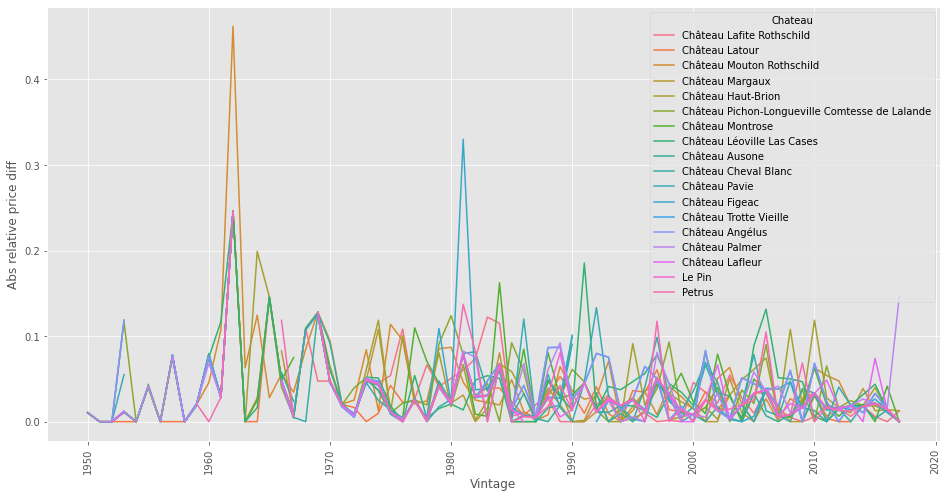

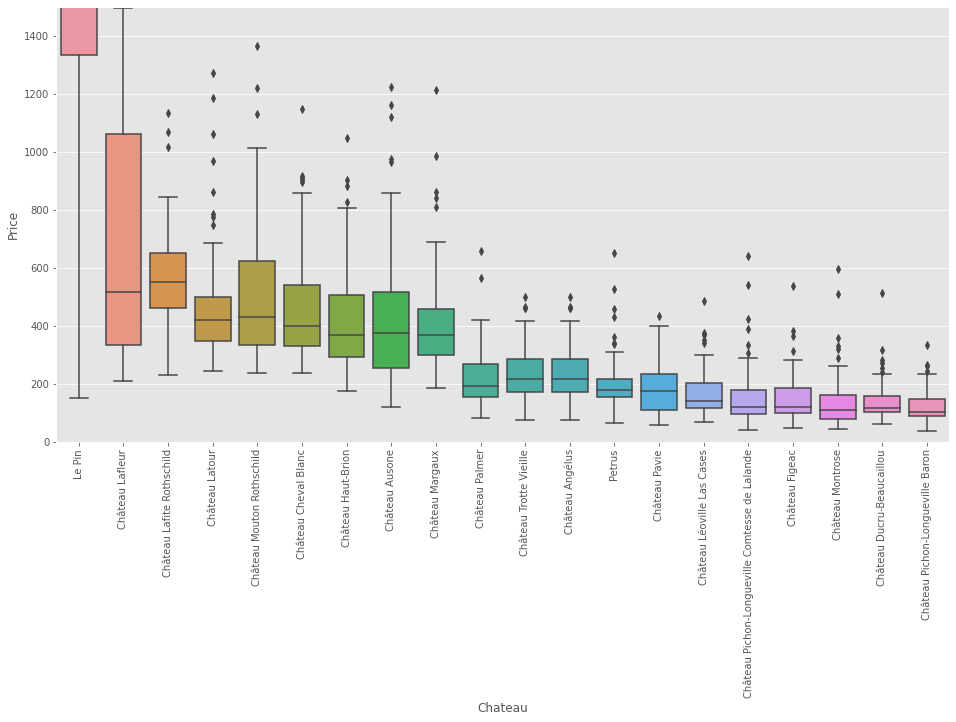

In [76]:
df_dec = prices.drop('Category', axis=1).transpose().reset_index().melt(id_vars='index').rename(columns={'index':'Vintage', 'variable':'Chateau', 'value':'Price'})[['Chateau','Vintage','Price']]
df_dec = df_dec.replace(-100, np.NaN)

df_may = prices_may.drop('Category', axis=1).transpose().reset_index().melt(id_vars='index').rename(columns={'index':'Vintage', 'variable':'Chateau', 'value':'Price'})[['Chateau','Vintage','Price']]
df_may = df_may.replace(-100, np.NaN)


#Combine both databases
df = df_dec
df['Price dec'] = df_dec['Price']
df['Price may'] = df_may['Price']
df['Price'] = df.apply(
    lambda row: row['Price may'] if (pd.isnull(row['Price dec']) and not pd.isnull(row['Price may']))
        else (row['Price dec'] if (not pd.isnull(row['Price dec']) and pd.isnull(row['Price may']))
                 else (row['Price dec'] + row['Price may'])/2)
    , axis=1
)

df['Log Price'] = np.log(df['Price'])


df['Price diff'] = df_may['Price'] - df_dec['Price']
df['Relative price diff'] = df['Price diff'] / df['Price']
df['Abs relative price diff'] = np.abs(df['Relative price diff'])

print('Avg absolute relative price diff', round(np.mean(df['Abs relative price diff']), 3))


ranking = df.groupby('Chateau')['Price'].mean().sort_values(ascending=False)
top_wines = ranking.index.to_list()[:30]
print(top_wines)

#Display prices differences for top wines
plt.figure(figsize=(16, 8))
sns.lineplot(data=df[(df['Chateau'].isin(top_wines[:18]))], x='Vintage', y='Abs relative price diff', hue='Chateau')
plt.xticks(rotation=90)
plt.show()




#Display boxplots of top wines from both rankings

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[(df_dec['Chateau'].isin(top_wines[:20]))], x='Chateau', y='Price', order = top_wines[:20])
plt.xticks(rotation=90)
plt.ylim(0,1500)
plt.savefig('views/top_wines.png', bbox_inches='tight')
plt.show()



In [77]:
top_wines.remove('Le Pin')
top_wines.remove('Château Lafleur')
top_wines.remove('Château Haut-Brion')

In [89]:
top_wines = top_wines[:15]
print(top_wines)

['Château Lafite Rothschild', 'Château Latour', 'Château Mouton Rothschild', 'Château Cheval Blanc', 'Château Ausone', 'Château Margaux', 'Château Palmer', 'Château Trotte Vieille', 'Château Angélus', 'Petrus', 'Château Pavie', 'Château Léoville Las Cases', 'Château Pichon-Longueville Comtesse de Lalande']


### Mapping top vineyards

In [79]:
locations = {
    'Château Lafite Rothschild': [ 45.225, -0.772],
    'Château Latour': [ 45.176, -0.745],
    'Château Mouton Rothschild': [ 45.213, -0.770],
    'Château Cheval Blanc': [ 44.919, -0.189],
    'Château Ausone': [ 44.889, -0.157],
    'Château Margaux': [ 45.044, -0.669],
    'Château Palmer': [ 45.036, -0.669],
    'Château Trotte Vieille': [ 44.894, -0.145],
    'Château Angélus': [ 44.893, -0.172],
    'Petrus': [ 44.931, -0.193],
    'Château Pavie': [ 44.883, -0.151],
    'Château Léoville Las Cases': [ 45.164, -0.740],
    'Château Pichon-Longueville Comtesse de Lalande': [ 45.176, -0.750]
}

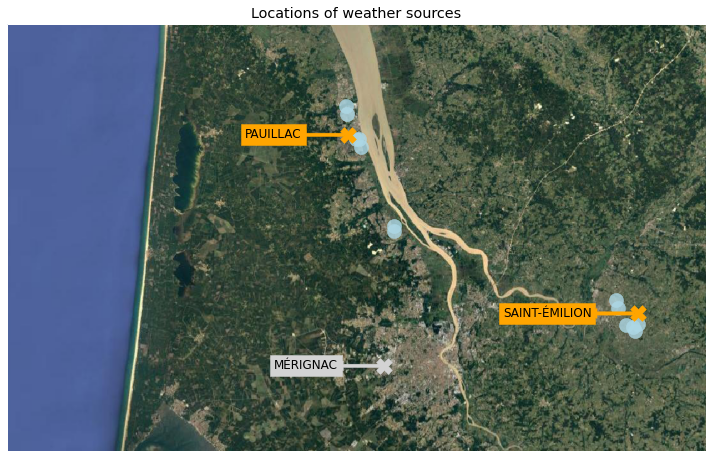

In [80]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

figure, ax = plt.subplots(1,1,figsize = (10,12),subplot_kw = {'projection': crs.Mercator()})       
figure.subplots_adjust(hspace = 0,wspace = 0,top = 0.925,left = 0.1)
ax.add_image(cimgt.GoogleTiles(style = 'satellite'), 10)

#ax.add_feature(cfeature.STATES)
#ax.add_feature(cfeature.COASTLINE)
ax.set_facecolor('white') 
ax.set_extent(
    [-1.5, 0, 44.70, 45.35],
    crs=crs.PlateCarree()
)
#ax.patch.set_edgecolor('black')  
#ax.patch.set_linewidth('2')

for vineyard in top_wines:
    ax.scatter(x = locations[vineyard][1], y = locations[vineyard][0],
        color = "lightblue",
        s = 200,
        alpha = 0.8,
        marker='o',
        transform = crs.PlateCarree())
    
    #ax.text(locations[vineyard][1], locations[vineyard][0], vineyard, {'color': 'k', 'fontsize': 8}, transform=crs.PlateCarree()._as_mpl_transform(ax),
    #             bbox=dict(boxstyle="round",
    #               ec='#121212', fc='lightgrey'))
    
# Adding Pauillac Station, LON = -0.767 / LAT = 45.182
ax.arrow(-0.764, 45.182,(-0.85 + 0.767), 0, head_starts_at_zero = True, width=0.005, color='orange', transform = crs.PlateCarree())
ax.scatter(x = -0.767, y = 45.182,
        color = 'orange',
        s = 250,
        alpha = 1,
        marker = 'X',
        zorder = 10,
        transform = crs.PlateCarree())
ax.text(-0.867, 45.182, 'PAUILLAC', {'color': 'k', 'fontsize': 12}, transform=crs.PlateCarree()._as_mpl_transform(ax),
                 bbox=dict(edgecolor='orange',fc='orange'), 
        ha = 'right', va = 'center')

# Adding Saint-Emilion Station, LON : —0.145 / LAT : 44.91
ax.arrow(-0.142, 44.91, -0.08, 0, head_starts_at_zero = True, width=0.005, color='orange', transform = crs.PlateCarree())
ax.scatter(x = -0.145, y = 44.91,
        color = "orange",
        s = 250,
        alpha = 1,
        marker = 'X',
        zorder = 10,
        transform = crs.PlateCarree())
ax.text(-0.245, 44.91, 'SAINT-ÉMILION', {'color': 'k', 'fontsize': 12}, transform=crs.PlateCarree()._as_mpl_transform(ax),
                bbox=dict(edgecolor='orange',fc='orange'), 
        ha = 'right', va = 'center')


# Adding merignac

ax.arrow(-0.687, 44.83, -0.08, 0, head_starts_at_zero = True, width=0.005, color='lightgrey', transform = crs.PlateCarree())
ax.scatter(x = -0.69, y = 44.83,
        color = "lightgrey",
        s = 250,
        alpha = 1,
        marker = 'X',
        zorder = 10,
        transform = crs.PlateCarree())
ax.text(-0.79, 44.83, 'MÉRIGNAC', {'color': 'k', 'fontsize': 12}, transform=crs.PlateCarree()._as_mpl_transform(ax),
                bbox=dict(edgecolor='lightgrey',fc='lightgrey'), 
        ha = 'right', va = 'center')

ax.set_title('Locations of weather sources')
plt.tight_layout()

plt.savefig('views/locations.png')
plt.show()

C:\Users\Rico\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


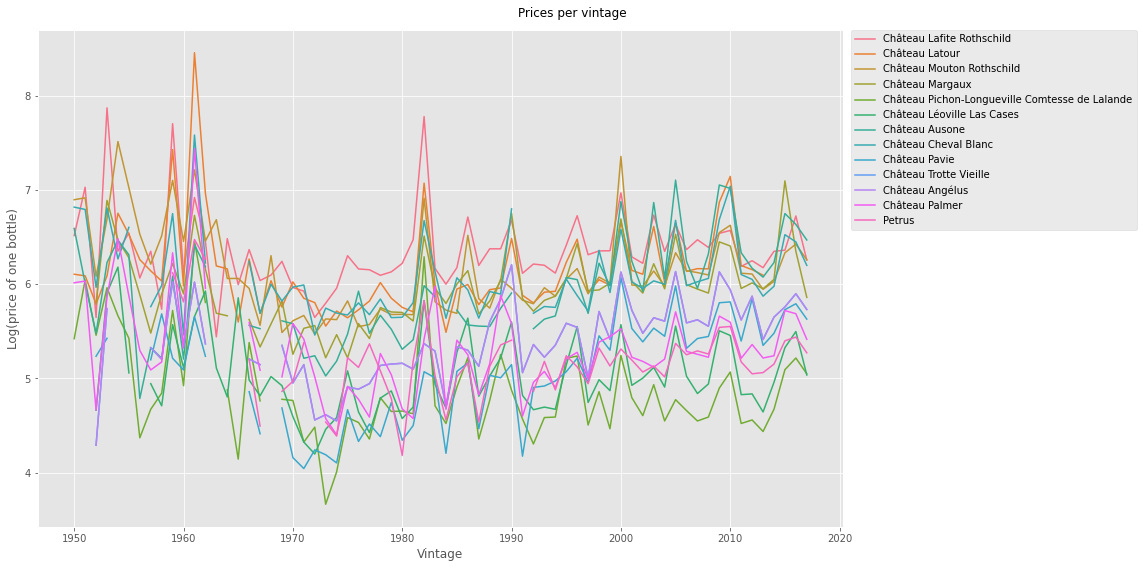

Series([], Name: Price, dtype: float64)
R2 between medoc and saint emilion: 0.3488539502867335
Spearman between medoc and saint emilion: 0.8694183331329601


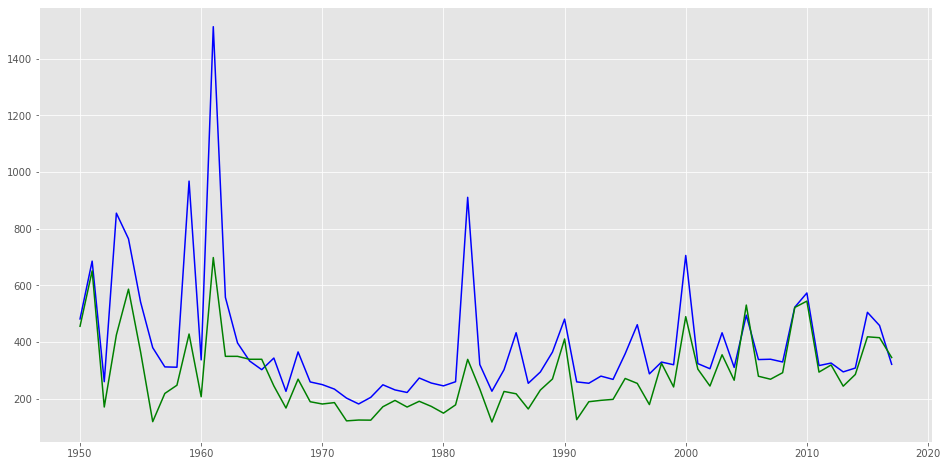

In [88]:
premiers = df[df['Chateau'].isin(top_wines)]
premiers.loc[:,'Log Price'] = np.log(premiers['Price'])
premiers.loc[:,'Vintage'] = premiers['Vintage'].astype(int)

plt.figure(figsize=(16,8))
sns.lineplot(data=premiers, x='Vintage', y='Log Price', hue='Chateau')
plt.ylabel('Log(price of one bottle)')
plt.xlabel('Vintage')
plt.suptitle('Prices per vintage')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.tight_layout()
plt.savefig('views/prices_per_vintage.png')
plt.show()



medoc = df[df['Chateau'].isin(['Château Lafite Rothschild', 'Château Mouton Rothschild', 'Château Latour', 'Château Margaux', 'Château Palmer', 'Château Léoville Las Cases', 'Château Pichon-Longueville Comtesse de Lalande'])]
st_emilion = df[df['Chateau'].isin(['Château Cheval Blanc', 'Château Ausone','Château Angélus', 'Château Trotte Vieille','Château Pavie', 'Petrus', 'Château Figeac'])]

avg_price_medoc = medoc.groupby('Vintage')['Price'].mean().loc[1950:2017].fillna(method='ffill')
avg_price_st_emilion = st_emilion.groupby('Vintage')['Price'].mean().loc[1950:2017].fillna(method='ffill')

avg_price_medoc.reset_index().to_excel('data/prices/generated_average_prices_medoc.xlsx', index=False)
avg_price_st_emilion.reset_index().to_excel('data/prices/generated_average_prices_st_em.xlsx', index=False)

plt.figure(figsize=(16,8))
plt.plot(avg_price_medoc, color='b')
plt.plot(avg_price_st_emilion, color='g')
print(avg_price_st_emilion[avg_price_st_emilion.isnull()])

from sklearn.metrics import r2_score
from scipy.stats import spearmanr

print('R2 between medoc and saint emilion:', r2_score(avg_price_medoc, avg_price_st_emilion))
print('Spearman between medoc and saint emilion:', spearmanr(avg_price_medoc, avg_price_st_emilion)[0])

The wines of our sample have consistent variations.

Checker que les prix s'influencent pas trop entre eux (prix en primeurs fixés par le premier), voir si les critiques ont la meme correlation

In [82]:
average = premiers.groupby('Vintage')['Price'].mean().to_frame()

display(average.head())
average.reset_index().to_excel('data/prices/generated_average_prices.xlsx', index=False)

,Price
Vintage,
1950,477.076923
1951,676.000000
1952,232.583333
1953,667.769231
1954,725.000000


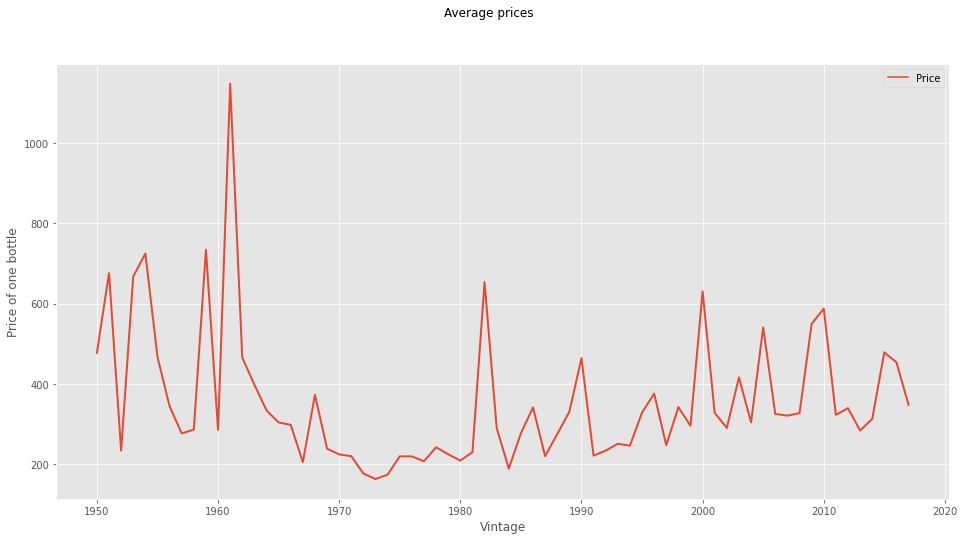

In [83]:
plt.figure(figsize=(16,8))
sns.lineplot(data=average, linewidth=2.0, color='black')

plt.ylabel('Price of one bottle')
plt.xlabel('Vintage')
plt.suptitle('Average prices')
plt.show()

# WA Ratings

In [84]:
ratings = pd.read_excel('data/ratings.xlsx')

#Select ratings up to 2017
ratings = ratings[ratings['Vintage'] <= 2017]

display(ratings.head())

,Chateau,Category,Vintage,Rating - LB,Rating - HB,Date,Critic
0,Château Lafite Rothschild,Médoc,1994,86,90,1995-04-01,Robert Parker
1,Château Lafite Rothschild,Médoc,1995,92,95,1996-04-01,Robert Parker
2,Château Lafite Rothschild,Médoc,1996,91,93,1997-04-01,Robert Parker
3,Château Lafite Rothschild,Médoc,1997,90,93,1998-04-01,Robert Parker
4,Château Lafite Rothschild,Médoc,1998,91,94,1999-04-01,Robert Parker


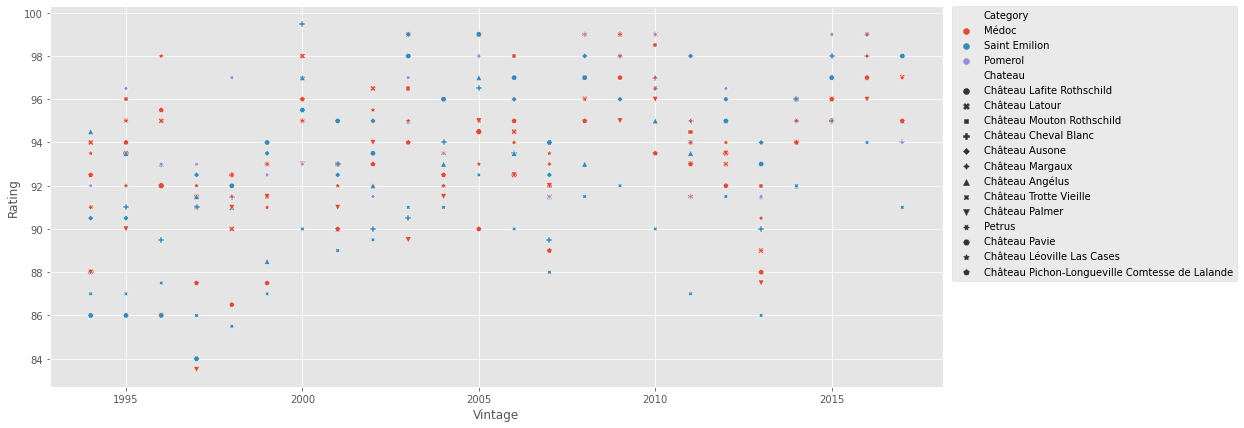

In [85]:
plt.figure(figsize=(16,7))
ratings['Rating'] = (ratings['Rating - LB'] + ratings['Rating - HB'])/2
ratings = ratings[ratings['Chateau'].isin(top_wines)]
sns.scatterplot(data=ratings, x='Vintage', y='Rating',hue='Category', style='Chateau')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.savefig('views/RP_ratings.png', bbox_inches='tight')

Montrer que Latour s'est barré des primeurs parce que sous noté en primeur

In [86]:
average_ratings = ratings.groupby('Vintage')['Rating'].mean().to_frame()
average_ratings.to_excel('data/generated_average_ratings.xlsx')

# RP Ratings vs Price

In [87]:
average_ratings = ratings.groupby('Vintage')['Rating'].mean().to_frame().loc[1994:2017]

average_price = average.loc[1994:2017]

from scipy.stats import spearmanr
print('Spearman correlation ratings-prices:', spearmanr(average_ratings, average_price)[0])
print('Spearman correlation ratings-prices, 1994 - 2005:', spearmanr(average_ratings.loc[1994:2005], average_price.loc[1994:2005])[0])
print('Spearman correlation ratings-prices, 2006 - 2017:', spearmanr(average_ratings.loc[2006:2017], average_price.loc[2006:2017])[0])

from sklearn.metrics import r2_score

print('R2 Score between ratings and prices:', r2_score(average_price, average_ratings))

Spearman correlation ratings-prices: 0.7408695652173911
Spearman correlation ratings-prices, 1994 - 2005: 0.6923076923076924
Spearman correlation ratings-prices, 2006 - 2017: 0.8391608391608393
R2 Score between ratings and prices: -6.960056039119366


Series([], Name: Price, dtype: float64)
R2 between Médoc and Saint-Emilion ratings: 0.6693763059638838
Spearman between Médoc and Saint-Emilion ratings: 0.8512959540236272

Spearman correlation ratings and prices for Médoc: 0.6549249991743813
Spearman correlation ratings and prices for Saint-Emilion: 0.8628653419331369


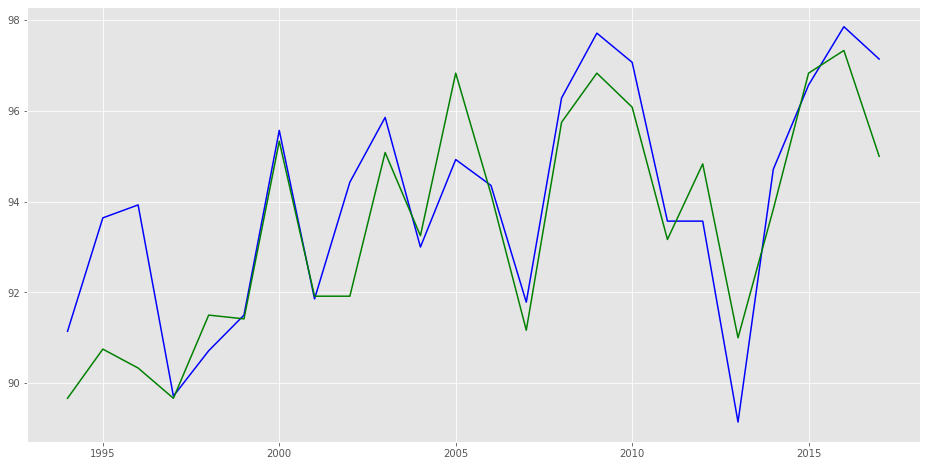

In [113]:
medoc = df[df['Chateau'].isin(['Château Lafite Rothschild', 'Château Mouton Rothschild', 'Château Latour', 'Château Margaux', 'Château Palmer', 'Château Léoville Las Cases', 'Château Pichon-Longueville Comtesse de Lalande'])]
st_emilion = df[df['Chateau'].isin(['Château Cheval Blanc', 'Château Ausone','Château Angélus', 'Château Trotte Vieille','Château Pavie', 'Petrus', 'Château Figeac'])]
avg_price_medoc = medoc.groupby('Vintage')['Price'].mean().loc[1950:2017].fillna(method='ffill')
avg_price_st_emilion = st_emilion.groupby('Vintage')['Price'].mean().loc[1950:2017].fillna(method='ffill')

rating_medoc = ratings[ratings['Chateau'].isin(['Château Lafite Rothschild', 'Château Mouton Rothschild', 'Château Latour', 'Château Margaux', 'Château Palmer', 'Château Léoville Las Cases', 'Château Pichon-Longueville Comtesse de Lalande'])]
rating_st_emilion = ratings[ratings['Chateau'].isin(['Château Cheval Blanc', 'Château Ausone','Château Angélus', 'Château Trotte Vieille','Château Pavie', 'Petrus'])]
#print(rating_medoc)
avg_rating_medoc = rating_medoc.groupby('Vintage')['Rating'].mean().loc[1950:2017].fillna(method='ffill')
avg_rating_st_emilion = rating_st_emilion.groupby('Vintage')['Rating'].mean().loc[1950:2017].fillna(method='ffill')


plt.figure(figsize=(16,8))
plt.plot(avg_rating_medoc, color='blue')
plt.plot(avg_rating_st_emilion, color='green')
print(avg_price_st_emilion[avg_price_st_emilion.isnull()])

from sklearn.metrics import r2_score
from scipy.stats import spearmanr

print('R2 between Médoc and Saint-Emilion ratings:', r2_score(avg_rating_medoc, avg_rating_st_emilion))
print('Spearman between Médoc and Saint-Emilion ratings:', spearmanr(avg_rating_medoc, avg_rating_st_emilion)[0])

print('\nSpearman correlation ratings and prices for Médoc:', spearmanr(avg_rating_medoc.loc[1994:2017], avg_price_medoc.loc[1994:2017])[0])
print('Spearman correlation ratings and prices for Saint-Emilion:', spearmanr(avg_rating_st_emilion.loc[1994:2017], avg_price_st_emilion.loc[1994:2017])[0])

 Haut Brion increases Spearman correlation between ratings and prices for Medoc.

## Filtering input

Maybe we want to filter out the global trend, that is probably due at least in part to parasitic market effects not related to the wine quality. 

About this trend, see for example http://winegourd.blogspot.com/2020/07/the-outrageous-prices-of-modern-high.html.


Now, the goal here is to even out the global trend by filtering the price range into a trend and a residual component.

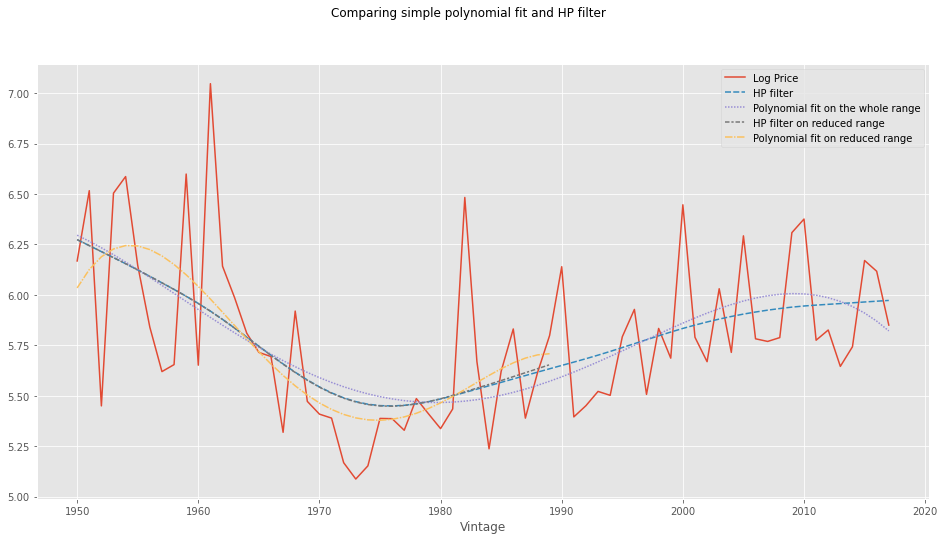

C:\Users\Rico\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


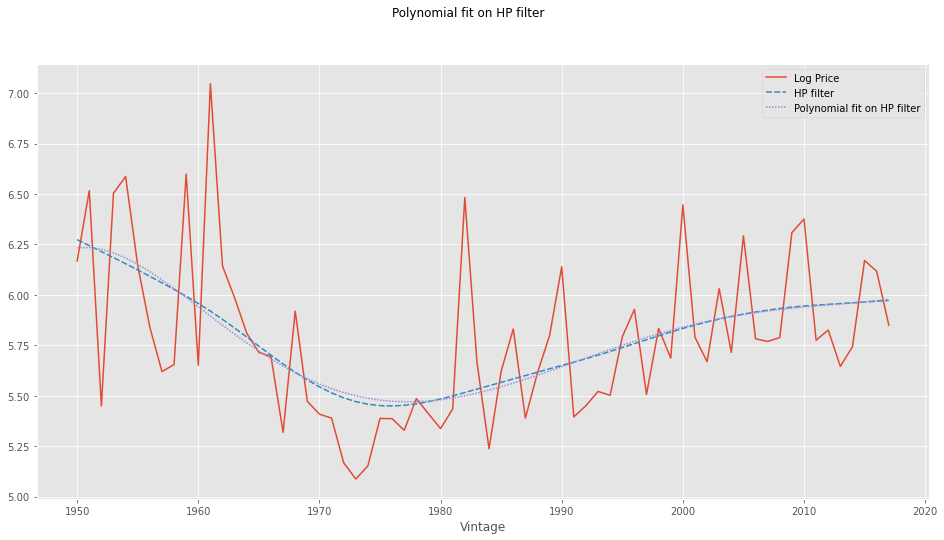

,Price,Log Price,HP filter,Polynomial fit on the whole range,HP filter on reduced range,Polynomial fit on reduced range,Polynomial fit on HP filter
Vintage,,,,,,,
1950,477.076923,6.167678,6.273306,6.295460,6.273671,6.034021,6.232909
1951,676.000000,6.516193,6.243704,6.265581,6.244006,6.125271,6.234624
1952,232.583333,5.449249,6.213996,6.233202,6.214234,6.188593,6.225765
1953,667.769231,6.503943,6.184350,6.198707,6.184523,6.227180,6.207917
1954,725.000000,6.586172,6.154167,6.162467,6.154273,6.244076,6.182548
...,...,...,...,...,...,...,...
2013,282.923077,5.645175,5.956510,5.967159,NaN,NaN,5.954583
2014,311.791667,5.742335,5.960374,5.942015,NaN,NaN,5.959591
2015,478.208333,6.170046,5.964374,5.909647,NaN,NaN,5.964965


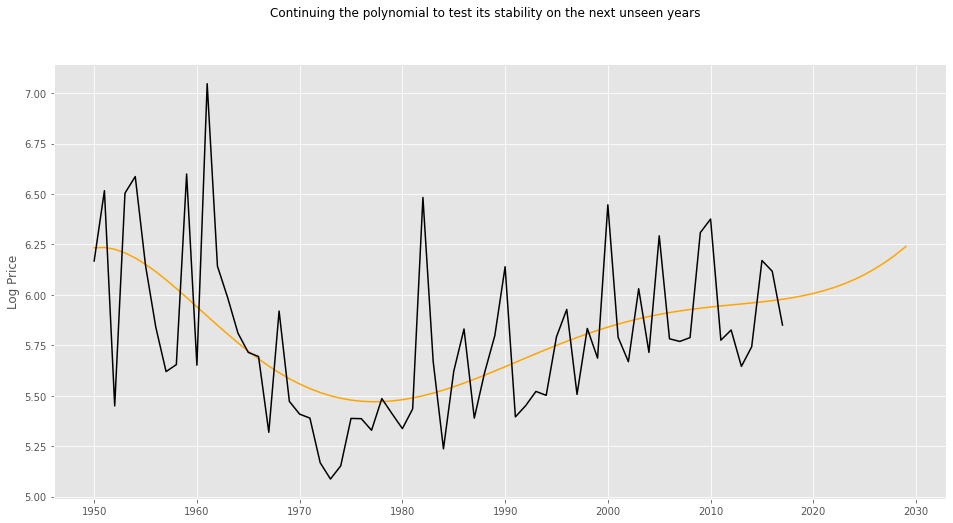

In [15]:
import statsmodels.api as sm

average = premiers.groupby('Vintage')[['Price']].mean().dropna(axis=0)
average['Log Price'] = np.log(average['Price'])


# Try a Hodrick Prescott filter
average['HP filter'] = sm.tsa.filters.hpfilter(average['Log Price'], lamb=1000)[1]

fit = np.polyfit(average.index,average['Log Price'], 4)
poly = np.poly1d(fit)
average['Polynomial fit on the whole range'] = poly(average.index)


#Also try versions of both filters on shorter period of time
average['HP filter on reduced range'] = sm.tsa.filters.hpfilter(average['Log Price'][:40], lamb=1000)[1]
fit_short = np.polyfit(average.index[:40], average['Log Price'][:40], 4)
poly_short = np.poly1d(fit_short)

average['Polynomial fit on reduced range'] = np.nan
average.iloc[:40, -1] = poly_short(average.index[:40])


plt.figure(figsize=(16,8))
sns.lineplot(data=average[['Log Price','HP filter','Polynomial fit on the whole range','HP filter on reduced range','Polynomial fit on reduced range']])
plt.suptitle('Comparing simple polynomial fit and HP filter')
plt.show()


# Fit a polynomial to the HP filtered data
fit_hp = np.polyfit(average.index, average['HP filter'], 15)
poly_hp = np.poly1d(fit_hp)
average['Polynomial fit on HP filter'] = poly_hp(average.index)

plt.figure(figsize=(16,8))
sns.lineplot(data=average[['Log Price','HP filter', 'Polynomial fit on HP filter']])
plt.suptitle('Polynomial fit on HP filter')
plt.show()
display(average)
#Checking how fast our new polynomial diverges
plt.figure(figsize=(16,8))
sns.lineplot(x= range(1950, 2030), y=poly_hp(range(1950, 2030)), color='orange')
sns.lineplot(x= range(1950, 2018), y=average['Log Price'], color='black')
plt.suptitle('Continuing the polynomial to test its stability on the next unseen years')
plt.show()


In [ ]:
average['Corrected Log Price'] = average['Log Price'] - average['Polynomial fit on HP filter']

average[['Price','Log Price','Corrected Log Price']].reset_index().to_excel('data/generated_average_prices.xlsx', index=False)

The previous graphs show several outputs. First, fitting a polynomial gave good fits on a 50y+ range of time, but poorer results on shorter periods, whereas HP filter result was not impacted as deeply by a change in length. Thus, the best solution to get a time range-agnostic trend is fitting a polynomial on the HP filter. We will use this technique from now on.

In [ ]:
ratings = pd.read_excel('data/ratings.xlsx')
display(ratings.head())

plt.figure(figsize=(16,8))
sns.lineplot(data=ratings, x='Vintage',y='RP Rating', hue='Chateau')
plt.show()

In [ ]:
sample = premiers[(premiers['Chateau'].isin(['Château Latour Pauillac','Château Lafite Rothschild Pauillac']))&(premiers['Vintage']>=1989)&(premiers['Vintage']<=2013)]
sample['Corrected Log Price'] = sample['Log Price'] - poly_hp(sample['Vintage'])

sns.lineplot(data=sample, x='Vintage', y='Log Price')
plt.show()
sns.lineplot(data=sample, x='Vintage', y='Corrected Log Price')
plt.show()

sample = sample.sort_values(['Chateau','Vintage']).reset_index()
ratings = ratings.sort_values(['Chateau','Vintage']).reset_index(drop=True)
sample['Rating'] = ratings['RP Rating']

In [ ]:
plt.figure(figsize=(16,3))
sns.lineplot(data=sample, x='Vintage', y='Log Price', hue='Chateau')
plt.show()

plt.figure(figsize=(16,3))
sns.lineplot(data=sample, x='Vintage', y='Corrected Log Price', hue='Chateau')
plt.show()

plt.figure(figsize=(16,3))
sns.lineplot(data=sample, x='Vintage', y='Rating', hue='Chateau')
plt.show()

In [ ]:
def scatter_text(data, x, y, hue, text_column):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    plt.figure(figsize=(16,8))

    p1 = sns.scatterplot(x, y, data=data, size = 8, legend=False, hue=hue)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='semibold')
    # Set title and axis labels
    return p1
p1 = scatter_text(sample, 'Log Price', 'Rating', 'Chateau','Vintage')
plt.suptitle('Log Price vs Rating')
plt.show()

p2 = scatter_text(sample, 'Corrected Log Price', 'Rating', 'Chateau','Vintage')
plt.suptitle('Corrected Log Price vs Rating')
plt.show()

It seems that our correction of price was not relevant, because the Corrected Log Price is less coherent with the ratings. 
Maybe the recent price increase trend is indeed linked to a quality increase.